In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm
from sklearn.linear_model import LogisticRegression
# Standard plotly imports
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
# Using plotly + cufflinks in offline mode
import cufflinks
cufflinks.go_offline(connected=True)
init_notebook_mode(connected=True)
sns.set()

### Import Data and Explore Data

In [43]:
train_df=pd.read_csv(r"C:\Users\ACER M5\Downloads\house-prices-advanced-regression-techniques\train.csv")
test_df=pd.read_csv(r"C:\Users\ACER M5\Downloads\house-prices-advanced-regression-techniques\test.csv")

In [3]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
train_df.describe()                   #only numerical data columns

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [6]:
train_targets=train_df['SalePrice']

### Visualize Data

### 1.Single Variable Distributions: Histograms and Boxplots

In [30]:
#train_df['SalePrice'].iplot(kind='hist', xTitle='SalePrice',
 #                 yTitle='count', title='SalePrice Distribution')

In [31]:
#train_df[['OverallQual', 'OverallCond']].iplot(
 #   kind='hist',
  #  histnorm='percent',
   # barmode='overlay',
   # xTitle='ratings',
    # yTitle='frequency',
    # title='Condition depending upon quality')

In [6]:
import plotly.figure_factory as ff   #for advanced plots

In [10]:
Figure=ff.create_scatterplotmatrix(
    train_df[['LotFrontage', 'LotArea', 'SalePrice',      
        'LandContour','LotShape','Utilities','SaleCondition']],
    diag='histogram',
    index='SalePrice',height=1500,width=1500)
#Figure.iplot()

In [11]:
corrs = train_df.corr()
figure = ff.create_annotated_heatmap(
    z=corrs.values,
    x=list(corrs.columns),
    y=list(corrs.index),
    annotation_text=corrs.round(2).values,
    showscale=True)
#figure.ilpot()

### Prepare Data for ML Algorithm

In [7]:
train_df.drop(columns=['SalePrice','Id'],inplace=True)

In [8]:
numerical_columns=train_df.describe().columns
for i in range (0, numerical_columns.shape[0]):
    train_df[numerical_columns[i]].fillna(train_df[numerical_columns[i]].median(),inplace=True)
    

In [9]:
Total_columns=train_df.columns
cat_columns=list(set(Total_columns) - set(numerical_columns))
housing_cat=train_df[cat_columns]
housing_cat.fillna(0,inplace=True)


In [10]:
housing_cat.shape

(1460, 43)

In [11]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
for c in cat_columns:
    train_df[c]=encoder.fit_transform(train_df[c])

In [12]:
housing_cat_data= train_df[cat_columns]

In [13]:
housing_num= train_df[numerical_columns].values

In [14]:
housing_full= np.concatenate((housing_cat_data,housing_num),axis=1)

In [15]:
housing_full.shape


(1460L, 79L)

### Model ,Cross-Validation,Fine-Tuning

In [16]:
from sklearn.ensemble import RandomForestRegressor
rnf_reg=RandomForestRegressor()
rnf_reg.fit(housing_full,train_targets)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [17]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(rnf_reg, housing_full, train_targets,
scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [18]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())
    
display_scores(tree_rmse_scores)

('Scores:', array([26480.98147251, 28229.74272511, 24758.87293472, 42609.21301096,
       32774.7840605 , 30753.43982767, 24257.73554957, 26921.03695911,
       48272.6887393 , 30285.50358248]))
('Mean:', 31534.399886192106)
('Standard deviation:', 7504.188939651477)


In [19]:
feature_list=train_df.columns
# Get numerical feature importances
importances = list(rnf_reg.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 3)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
for pair in feature_importances:
    print('Variable: {:20} Importance: {}'.format(*pair)) 


Variable: BsmtFullBath         Importance: 0.584
Variable: GarageYrBlt          Importance: 0.094
Variable: 3SsnPorch            Importance: 0.044
Variable: Functional           Importance: 0.037
Variable: FireplaceQu          Importance: 0.032
Variable: KitchenAbvGr         Importance: 0.023
Variable: Fireplaces           Importance: 0.019
Variable: GrLivArea            Importance: 0.018
Variable: FullBath             Importance: 0.013
Variable: ScreenPorch          Importance: 0.013
Variable: HalfBath             Importance: 0.009
Variable: BedroomAbvGr         Importance: 0.008
Variable: ExterQual            Importance: 0.007
Variable: BsmtFinSF1           Importance: 0.007
Variable: LowQualFinSF         Importance: 0.007
Variable: PoolArea             Importance: 0.006
Variable: PoolQC               Importance: 0.005
Variable: LandContour          Importance: 0.004
Variable: MasVnrArea           Importance: 0.004
Variable: BsmtHalfBath         Importance: 0.004
Variable: TotRmsAbvG

Text(0.5,1,'Variable Importances')

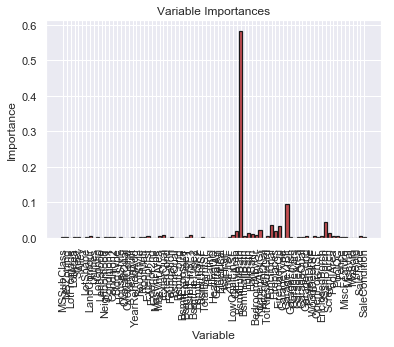

In [20]:
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical', color = 'r', edgecolor = 'k', linewidth = 1.2)
# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable')
plt.title('Variable Importances')

Text(0.5,1,'Cumulative Importances')

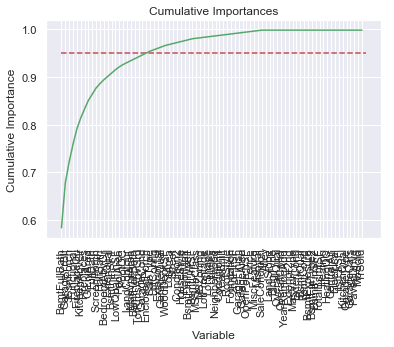

In [21]:
# List of features sorted from most to least important
sorted_importances = [importance[1] for importance in feature_importances]
sorted_features = [importance[0] for importance in feature_importances]
# Cumulative importances
cumulative_importances = np.cumsum(sorted_importances)
# Make a line graph
plt.plot(x_values, cumulative_importances, 'g-')
# Draw line at 95% of importance retained
plt.hlines(y = 0.95, xmin=0, xmax=len(sorted_importances), color = 'r', linestyles = 'dashed')
# Format x ticks and labels
plt.xticks(x_values, sorted_features, rotation = 'vertical')
# Axis labels and title
plt.xlabel('Variable')
plt.ylabel('Cumulative Importance')
plt.title('Cumulative Importances')

In [22]:
# Find number of features for cumulative importance of 95%
# Add 1 because Python is zero-indexed
print('Number of features for 95% importance:', np.where(cumulative_importances > 0.95)[0][0] + 1)

('Number of features for 95% importance:', 23)


In [23]:
important_feature_names = [feature[0] for feature in feature_importances[0:30]]

In [26]:
new_train_data=train_df[important_feature_names]
new_rnf_reg=RandomForestRegressor()
new_rnf_reg.fit(new_train_data.values,train_targets)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [27]:
new_scores = cross_val_score(new_rnf_reg, new_train_data.values, train_targets,
scoring="neg_mean_squared_error", cv=10)
new_tree_rmse_scores = np.sqrt(-new_scores)
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())
    
display_scores(new_tree_rmse_scores)

('Scores:', array([31390.79083408, 32349.72132744, 28732.26484418, 50560.34606054,
       46730.28382902, 28488.26275327, 27862.33937948, 31048.92307568,
       48743.82134796, 30500.4429759 ]))
('Mean:', 35640.71964275491)
('Standard deviation:', 8677.857754540666)


In [29]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(new_train_data.values, train_targets)
rf_random.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 12.3min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 22.8min finished


{'bootstrap': False,
 'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 400}

In [31]:
new_rnft_reg=RandomForestRegressor(bootstrap= False,
 max_depth=None,
 n_estimators=400,
 max_features='sqrt',                               
 min_samples_leaf= 1,
 min_samples_split=2,
 n_jobs= -1)
new_rnft_reg.fit(new_train_data.values,train_targets)

RandomForestRegressor(bootstrap=False, criterion='mse', max_depth=None,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=400, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [32]:
new_scores1 = cross_val_score(new_rnft_reg, new_train_data.values, train_targets,scoring="neg_mean_squared_error", cv=10)
new_randomforest_rmse_scores = np.sqrt(-new_scores1)
display_scores(new_randomforest_rmse_scores)

('Scores:', array([24137.11912819, 32207.75339251, 28211.44357257, 38435.08780729,
       39392.40793032, 29288.27019744, 26350.22585535, 29542.7949985 ,
       44778.96467095, 27364.45768403]))
('Mean:', 31970.8525237169)
('Standard deviation:', 6343.281837297388)


In [20]:
from sklearn.model_selection import GridSearchCV
parameters = [{ 'criterion' : ['mse'],'bootstrap':[True] , 'min_samples_split':[2,4,6,8], 
           'min_samples_leaf': [1,2,3,4,5],'max_depth':[2,4,6],'n_jobs':[-1]},
          { 'bootstrap':[False], 'min_samples_split':[4,6,10],
           'min_samples_leaf': [1,2,3,4,5,],'max_depth':[6,8,10]} ]
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, parameters, cv=5,
scoring='neg_mean_squared_error')
grid_search.fit(new_train_data.values, train_targets)
grid_search.best_params_

KeyboardInterrupt: 

In [22]:
rnft_reg=RandomForestRegressor(bootstrap= True,
 criterion= 'mse',
 max_depth=6,
 min_samples_leaf= 5,
 min_samples_split=8,
 n_jobs= -1)
rnft_reg.fit(housing_full,train_targets)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=6,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=5, min_samples_split=8,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [23]:
scores1 = cross_val_score(rnft_reg, housing_full, train_targets,scoring="neg_mean_squared_error", cv=10)
randomforest_rmse_scores = np.sqrt(-scores1)

In [24]:
display_scores(randomforest_rmse_scores)

('Scores:', array([28180.69658088, 30534.24826909, 25262.3049009 , 40573.70920945,
       38466.53288284, 28900.04662657, 27389.90505614, 27815.40694769,
       46390.36127843, 28800.20426147]))
('Mean:', 32231.341601345815)
('Standard deviation:', 6652.939843216475)


In [33]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(housing_full, train_targets)
rf_random.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 14.1min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 28.0min finished


{'bootstrap': False,
 'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 400}

In [35]:
new_param_rf_reg=RandomForestRegressor(bootstrap= False,
 max_depth=None,
 n_estimators=400,
 max_features='sqrt',                               
 min_samples_leaf= 1,
 min_samples_split=2,
 n_jobs= -1)
new_param_rf_reg.fit(housing_full,train_targets)


RandomForestRegressor(bootstrap=False, criterion='mse', max_depth=None,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=400, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [36]:
new_scores2 = cross_val_score(new_param_rf_reg, housing_full, train_targets,scoring="neg_mean_squared_error", cv=10)
new_param_rmse_scores = np.sqrt(-new_scores2)
display_scores(new_param_rmse_scores)

('Scores:', array([20432.64538013, 25605.72699714, 23092.31801058, 37107.25213815,
       34207.46364418, 26048.59805973, 22772.12838416, 22931.6775024 ,
       36212.58794391, 24090.76318548]))
('Mean:', 27250.11612458697)
('Standard deviation:', 5852.259111765575)


In [38]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=3.0, solver="cholesky")
ridge_reg.fit(housing_full, train_targets)

Ridge(alpha=3.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='cholesky', tol=0.001)

In [39]:
scores2 = cross_val_score(ridge_reg, housing_full, train_targets,scoring="neg_mean_squared_error", cv=10)
ridge_rmse_scores = np.sqrt(-scores2)
display_scores(ridge_rmse_scores)


('Scores:', array([22525.55251147, 28799.4149083 , 24101.56104056, 41602.25723983,
       35783.98254092, 28210.32563454, 27861.93356626, 26547.57873361,
       64826.34212007, 25501.91477774]))
('Mean:', 32576.086307330388)
('Standard deviation:', 12027.490692514546)


In [40]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=4.0,max_iter=5000)
lasso_reg.fit(housing_full, train_targets)
scores3 = cross_val_score(lasso_reg, housing_full, train_targets,scoring="neg_mean_squared_error", cv=10)
lasso_rmse_scores = np.sqrt(-scores3)
display_scores(lasso_rmse_scores)

('Scores:', array([22647.2031741 , 33939.07333279, 23903.54272513, 42146.21286618,
       35486.57759047, 28247.47560546, 27227.6266976 , 26305.45746236,
       69981.63645044, 26945.63290544]))
('Mean:', 33683.04388099808)
('Standard deviation:', 13345.407679006095)


### Preparing Test Data

In [37]:
test_df.drop(columns=['Id'],inplace=True)
test_numerical_columns=test_df.describe().columns
for i in range (0, test_numerical_columns.shape[0]):
    test_df[test_numerical_columns[i]].fillna(test_df[test_numerical_columns[i]].median(),inplace=True)

Total_test_columns=test_df.columns
test_cat_columns=list(set(Total_test_columns) - set(test_numerical_columns))
test_housing_cat=test_df[test_cat_columns]
test_housing_cat.fillna(0,inplace=True)


In [38]:
for c in test_cat_columns:
    test_df[c]=encoder.fit_transform(test_df[c])
    
test_housing_cat_data=test_df[test_cat_columns]

In [39]:
test_housing_num_data=test_df[test_numerical_columns].values
test_housing_full=np.concatenate((test_housing_cat_data,test_housing_num_data),axis=1)

In [40]:
test_housing_full.shape

(1459L, 79L)

In [41]:
test_df.shape

(1459, 79)

### Predict test data results

In [42]:
final_results=new_param_rf_reg.predict(test_housing_full)


In [44]:
final_submission=pd.DataFrame()
final_submission['Id']=test_df['Id']
final_submission['SalePrice']=final_results.astype(np.int64)

In [45]:
final_submission.to_csv('housing_submission2.csv',index=False)